In [10]:
import pandas as pd
# Load your data into a DataFrame
df = pd.read_csv('cleaned_data.csv')
df.columns



Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'sql', 'aws', 'excel', 'powerbi_tableau', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [11]:
# To choose relevant columns
df_model=df[['avg_salary','Rating','num_comp','hourly','employer_provided','same_state','age',
             'python_yn','sql','aws','excel','powerbi_tableau','job_simp','seniority']]
df_model

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,sql,aws,excel,powerbi_tableau,job_simp,seniority
0,72.0,3.8,0,0,0,0,51,1,0,0,1,1,data scientist,na
1,87.5,3.4,0,0,0,0,40,1,0,0,0,0,data scientist,na
2,85.0,4.8,0,0,0,1,14,1,1,0,1,0,data scientist,na
3,76.5,3.8,3,0,0,1,59,1,0,0,0,0,data scientist,na
4,114.5,2.9,3,0,0,1,26,1,1,0,1,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,68.5,3.6,0,0,0,0,173,0,0,0,1,0,data scientist,na
595,87.5,3.9,2,0,0,1,13,1,1,1,1,0,data engineer,na
596,111.5,3.6,3,0,0,0,7,0,0,0,0,0,data scientist,senior
597,102.5,4.4,3,0,0,0,18,1,1,1,0,0,data engineer,senior


In [12]:
y= df["avg_salary"]
y

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
594     68.5
595     87.5
596    111.5
597    102.5
598    127.5
Name: avg_salary, Length: 599, dtype: float64

In [13]:
X= df[['job_simp','seniority','job_state','hourly','python_yn','sql','powerbi_tableau','Size','Revenue','age']]
X

,job_simp,seniority,job_state,hourly,python_yn,sql,powerbi_tableau,Size,Revenue,age
0,data scientist,na,NM,0,1,0,1,501 to 1000 employees,$50 to $100 million (USD),51
1,data scientist,na,MD,0,1,0,0,10000+ employees,$2 to $5 billion (USD),40
2,data scientist,na,FL,0,1,1,0,501 to 1000 employees,$100 to $500 million (USD),14
3,data scientist,na,WA,0,1,0,0,1001 to 5000 employees,$500 million to $1 billion (USD),59
4,data scientist,na,NY,0,1,1,0,51 to 200 employees,Unknown / Non-Applicable,26
...,...,...,...,...,...,...,...,...,...,...
594,data scientist,na,MA,0,0,0,0,5001 to 10000 employees,$10+ billion (USD),173
595,data engineer,na,CA,0,1,1,0,201 to 500 employees,$100 to $500 million (USD),13
596,data scientist,senior,PA,0,0,0,0,10000+ employees,$2 to $5 billion (USD),7
597,data engineer,senior,TN,0,1,1,0,1001 to 5000 employees,$100 to $500 million (USD),18


In [14]:
# Preprocess the categorical columns
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()

X["Size"]=labelencoder.fit_transform(X["Size"])
X["Revenue"]=labelencoder.fit_transform(X["Revenue"])
X["job_simp"]=labelencoder.fit_transform(X["job_simp"])
X["seniority"]=labelencoder.fit_transform(X["seniority"])
X["job_state"]=labelencoder.fit_transform(X["job_state"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_29652\3196176691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Size"]=labelencoder.fit_transform(X["Size"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_29652\3196176691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Revenue"]=labelencoder.fit_transform(X["Revenue"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_29652\3196176691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [15]:
import streamlit as st
import pandas as pd
import joblib
from sklearn import preprocessing

# Load your saved model
def load_model():
    return joblib.load("model")

# Main function to run the app
def main():
    st.title("Salary Prediction App")

    # Load model
    model = load_model()

    # Mapping dictionaries for converting encoded values to original categorical values
    size_map = {5: '501 to 1000 employees', 1: '10000+ employees', 2: '1001 to 5000 employees', 6: '51 to 200 employees', 3: '201 to 500 employees', 4: '5001 to 10000 employees', 0: '1 to 50 employees', 7: 'Unknown'}
    revenue_map = {9: '$50 to $100 million (USD)', 5: '$2 to $5 billion (USD)', 4: '$100 to $500 million (USD)', 10: '$500 million to $1 billion (USD)', 12: 'Unknown / Non-Applicable', 0: '$1 to $2 billion (USD)', 6: '$25 to $50 million (USD)', 3: '$10+ billion (USD)', 2: '$10 to $25 million (USD)', 7: '$5 to $10 billion (USD)', 11: 'Less than $1 million (USD)', 1: '$1 to $5 million (USD)', 8: '$5 to $10 million (USD)'}
    job_simp_map = {2: 'data scientist', 0: 'data analyst', 1: 'data engineer', 4: 'manager', 5: 'mle', 3: 'director'}
    seniority_map = {1: 'na', 2: 'senior', 0: 'jr'}
    job_state_map = {22: 'NM', 16: 'MD', 6: 'FL', 32: 'WA', 23: 'NY', 29: 'TX', 2: 'CA', 31: 'VA', 15: 'MA', 21: 'NJ', 3: 'CO', 10: 'IL', 13: 'KY', 25: 'OR', 4: 'CT', 17: 'MI', 5: 'DC', 0: 'AL', 19: 'MO', 24: 'OH', 26: 'PA', 7: 'GA', 11: 'IN', 14: 'LA', 33: 'WI', 20: 'NC', 1: 'AZ', 18: 'MN', 30: 'UT', 28: 'TN', 9: 'ID', 27: 'RI', 8: 'IA', 12: 'KS'}

    # User inputs for prediction
    st.sidebar.title("Input Features")
    job_state = st.sidebar.selectbox("Location", list(job_state_map.values()))
    seniority = st.sidebar.selectbox("Job Level", list(seniority_map.values()))
    size = st.sidebar.selectbox("Company Size", list(size_map.values()))
    revenue = st.sidebar.selectbox("Company Revenue", list(revenue_map.values()))
    job_simp = st.sidebar.selectbox("Job Role", list(job_simp_map.values()))
    hourly = st.sidebar.selectbox("Hourly Rate", ['Yes', 'No'])
    python_yn = st.sidebar.selectbox("Python Experience", ['Yes', 'No'])
    sql = st.sidebar.selectbox("SQL Experience", ['Yes', 'No'])
    powerbi_tableau = st.sidebar.selectbox("PowerBI/Tableau Experience", ['Yes', 'No'])
    age = st.sidebar.slider("Company Age", min_value=5, max_value=500, value=30)

    # Convert Yes/No options to 1/0
    hourly = 1 if hourly == 'Yes' else 0
    python_yn = 1 if python_yn == 'Yes' else 0
    sql = 1 if sql == 'Yes' else 0
    powerbi_tableau = 1 if powerbi_tableau == 'Yes' else 0

    # Preprocess the input features
    labelencoder = preprocessing.LabelEncoder()
    job_state_encoded = labelencoder.fit_transform([job_state])[0]
    seniority_encoded = labelencoder.transform([seniority])[0]
    size_encoded = labelencoder.transform([size])[0]
    revenue_encoded = labelencoder.transform([revenue])[0]
    job_simp_encoded = labelencoder.transform([job_simp])[0]

    # Make prediction
    inputs = [[job_state_encoded, seniority_encoded, size_encoded, revenue_encoded, job_simp_encoded, hourly, python_yn, sql, powerbi_tableau, age]]
    prediction = model.predict(inputs)

    # Display prediction
    st.write(f"Predicted Average Salary: ${prediction[0]:.2f}")

if __name__ == "__main__":
    main()


Encoded values for Size:
[5 1 2 6 3 4 0 7]
Original categorical values for Size:
[5 1 2 6 3 4 0 7]
Encoded values for Revenue:
[ 9  5  4 10 12  0  6  3  2  7 11  1  8]
Original categorical values for Revenue:
[ 9  5  4 10 12  0  6  3  2  7 11  1  8]
Encoded values for job_simp:
[2 0 1 4 5 3]
Original categorical values for job_simp:
[2 0 1 4 5 3]
Encoded values for seniority:
[1 2 0]
Original categorical values for seniority:
[1 2 0]
Encoded values for job_state:
[22 16  6 32 23 29  2 31 15 21  3 10 13 25  4 17  5  0 19 24 26  7 11 14
 33 20  1 18 30 28  9 27  8 12]
Original categorical values for job_state:
[22 16  6 32 23 29  2 31 15 21  3 10 13 25  4 17  5  0 19 24 26  7 11 14
 33 20  1 18 30 28  9 27  8 12]


C:\Users\DELL\AppData\Local\Temp\ipykernel_29652\1158430518.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = labelencoder.fit_transform(X[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_29652\1158430518.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = labelencoder.fit_transform(X[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_29652\1158430518.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [16]:
X
X.columns


Index(['job_simp', 'seniority', 'job_state', 'hourly', 'python_yn', 'sql',
       'powerbi_tableau', 'Size', 'Revenue', 'age'],
      dtype='object')

In [17]:
# Train test split
from sklearn.model_selection import train_test_split

# used 0.2 to have 20% in test set and 80% in train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X_train =scaler.fit_transform(X_train) 
scaled_X_test =scaler.fit_transform(X_test) 

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# define the function
def modelresults(predictions):
    print("Mean absolute error is {}".format(mean_absolute_error(y_test,predictions)))
    print("Root mean absolute error is {}".format(mean_squared_error(y_test,predictions)))

In [20]:
# Let's Build the model
# Build linear regression model(using statsmodel)
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm.astype(float)) # convert categorical variable to float before sticking in model

model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     36.98
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           3.64e-56
Time:                        06:42:25   Log-Likelihood:                -2886.8
No. Observations:                 599   AIC:                             5796.
Df Residuals:                     588   BIC:                             5844.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              61.8139      6.379      9.690      0.000      49.286      74.342
job_simp           12.2988      1.249      9.847      0.000       9.846      14.752
seniority          27.3343      2.714     10.072      0.000      22.004      32.665
job_state          -0.7947      0.118     -6.715      0.000      -1.027      -0.562
hourly            -60.8004     21.933     -2.772      0.006    -103.877     -17.724
python_yn          12.5730      2.789      4.508      0.000       7.095      18.051
sql                -7.2582      2.789     -2.602      0.009     -12.736      -1.781
powerbi_tableau    -3.2418      3.104     -1.044      0.297      -9.338       2.854
Size               -1.4526      0.700     -2.075      0.038      -2.827      -0.078
Revenue             0.3865      0.314      1.230      0.219      -0.231       1.004
age                 0.0288      0.027      1.083      0.279      -0.023       0.081
==============================================================================
Omnibus:                       81.082   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.808
Skew:                           0.827   Prob(JB):                     5.92e-32
Kurtosis:                       4.740   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Build regression model using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,scaled_X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

prelm=lm.predict(scaled_X_train)

c:\Users\DELL\Desktop\Python tutorial 2024\Data Science Projects\Portfolio Project\Data science project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
prelm=lm.predict(scaled_X_train)

c:\Users\DELL\Desktop\Python tutorial 2024\Data Science Projects\Portfolio Project\Data science project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.linear_model import Lasso

lm_l = Lasso()
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-22.942881089645454

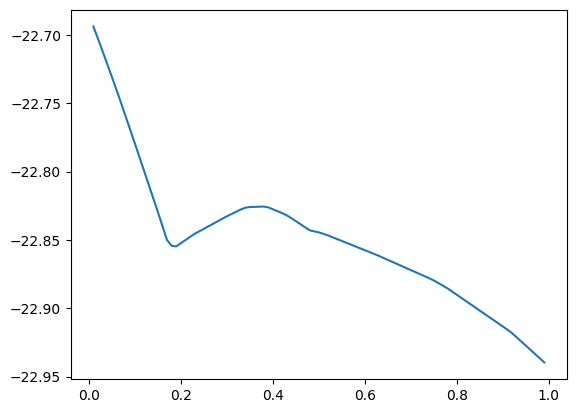

In [24]:
import matplotlib.pyplot as plt 

# Loop through different values of alpha to see which performs best
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [25]:
# to figure out the peak alpha value
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]


,alpha,error
0,0.01,-22.693882


In [26]:
# Use the peak alpha value to then build the lasso model
from sklearn.linear_model import Lasso

lm_l = Lasso(alpha=0.01)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-22.693882382365576

In [27]:
# build random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-16.99508520468329

In [28]:
# Hypertunning the rf model using GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('sqrt','log2', None)}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=240)

In [29]:
gs.best_score_

-16.005169987754957

In [30]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [31]:
# To compare with the X_test
from sklearn.metrics import mean_absolute_error
print('lm:',mean_absolute_error(y_test,tpred_lm))
print('lml: ',mean_absolute_error(y_test,tpred_lml))
print('rf: ',mean_absolute_error(y_test,tpred_rf)) # this performs best
# to model performance can be combined together
print('comb: ',mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2))


lm: 25.91053579856363
lml:  25.905352126723344
rf:  14.912148809090215
comb:  19.4663285337426


In [32]:
modelresults(tpred_rf
             )

Mean absolute error is 14.912148809090215
Root mean absolute error is 507.51780568401193


In [33]:
# Assuming X_test is a DataFrame with the second row you want to predict
# Ensure that X_test has the same number of features as your model was trained on
num_features = X_train.shape[1]

# Check the number of features
print("Number of features:", num_features)

# Now predict using the second row of X_test
prediction = gs.best_estimator_.predict(X_test.iloc[1,:].values.reshape(1, -1))

# Print the prediction
print("Predicted average salary:", prediction[0])


Number of features: 10
Predicted average salary: 145.175


c:\Users\DELL\Desktop\Python tutorial 2024\Data Science Projects\Portfolio Project\Data science project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [34]:
gs.best_estimator_.predict(X_test)

array([105.79777778, 145.175     ,  92.05416667,  69.71875   ,
       104.42385417, 194.52083333,  85.775     , 115.99541171,
        90.2916572 , 121.69166667,  94.25833333, 158.87760417,
       111.79034722,  57.92916667, 107.29539931, 154.08854167,
       111.67395833, 128.44930556,  83.88958333,  99.825     ,
        94.60104167,  55.82291667, 152.13333333, 112.90833333,
       107.8828125 ,  88.92916667, 117.82202381,  88.10416667,
       137.64194444,  97.72708333,  75.90833333, 119.65833333,
        92.1375    ,  87.48333333,  84.4375    , 119.96041667,
       100.13211806,  76.09791667, 230.79671875, 130.73638889,
        49.00833333,  98.32274306, 230.79671875,  63.98645833,
        98.18125   , 100.00208333, 112.109375  , 140.70333333,
        98.5875    ,  99.15104167, 115.46666667,  68.47760417,
        94.59166667, 124.11180556,  64.57083333,  85.20130997,
        90.99930556,  68.47760417, 100.00208333, 156.48819444,
        82.45416667, 107.275     , 103.39777778,  89.47

In [35]:
gs.best_estimator_.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]


c:\Users\DELL\Desktop\Python tutorial 2024\Data Science Projects\Portfolio Project\Data science project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


145.175

In [36]:
# Get the column names of the features used for training
feature_names = X_train.columns.tolist()

# Print the list of column names
print("Feature Names:", feature_names)

Feature Names: ['job_simp', 'seniority', 'job_state', 'hourly', 'python_yn', 'sql', 'powerbi_tableau', 'Size', 'Revenue', 'age']


In [37]:
# Get Unique Values of the variables

unique_state = df['Revenue'].unique()
unique_state

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$10 to $25 million (USD)', '$5 to $10 billion (USD)',
       'Less than $1 million (USD)', '$1 to $5 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [38]:
# Pickle model to use for production
import joblib as jb
jb.dump(gs.best_estimator_, "model")

['model']

In [39]:
X_value=X.job_state.unique()

state=df.job_state.unique()

print(X_value)
print(state)


[22 16  6 32 23 29  2 31 15 21  3 10 13 25  4 17  5  0 19 24 26  7 11 14
 33 20  1 18 30 28  9 27  8 12]
['NM' 'MD' 'FL' 'WA' 'NY' 'TX' 'CA' 'VA' 'MA' 'NJ' 'CO' 'IL' 'KY' 'OR'
 'CT' 'MI' 'DC' 'AL' 'MO' 'OH' 'PA' 'GA' 'IN' 'LA' 'WI' 'NC' 'AZ' 'MN'
 'UT' 'TN' 'ID' 'RI' 'IA' 'KS']


In [40]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,R_yn,sql,aws,excel,powerbi_tableau,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,0,0,1,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,0,1,0,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,1,0,1,0,data scientist,na,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,Data Science Project Manager,$37K-$100K (Glassdoor est.),"At MassMutual, we are passionate about helping...",3.6,MassMutual\n3.6,"Boston, MA","Springfield, MA",5001 to 10000 employees,1851,Company - Private,...,0,0,0,0,1,0,data scientist,na,5016,0
595,Data Engineer,$62K-$113K (Glassdoor est.),Do you find data architecture exciting? Does b...,3.9,Fivestars\n3.9,"San Francisco, CA","San Francisco, CA",201 to 500 employees,2011,Company - Private,...,1,0,1,1,1,0,data engineer,na,3813,2
596,"Principal, Data Science - Advanced Analytics",$86K-$137K (Glassdoor est.),IQVIA is the leading human data science compan...,3.6,IQVIA\n3.6,"Plymouth Meeting, PA","Durham, NC",10000+ employees,2017,Company - Public,...,0,0,0,0,0,0,data scientist,senior,5025,3
597,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,1,0,1,1,0,0,data engineer,senior,6130,3
